In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

## Data Cleaning

#### Import data

In [39]:
data_raw = pd.read_csv('data_raw.csv', sep=';')
data_raw.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### View predictor variables

In [40]:
#check dimensions
data_raw.shape

(4424, 37)

In [41]:
#check variable types
data_raw.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [42]:
#count missing values
data_raw.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nationality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [43]:
#check that each variable has only appropriate values
for var in data_raw.columns:
    print(f'{var}: {data_raw[var].unique()}')


Marital status: [1 2 4 3 5 6]
Application mode: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order: [5 1 2 4 3 6 9 0]
Course: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance: [1 0]
Previous qualification: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade): [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nationality

## Assess Target Variable

#### View target variable

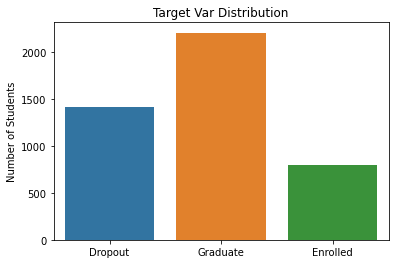

In [44]:
sns.countplot(x=data_raw['Target'], data=data_raw)

plt.title('Target Var Distribution')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

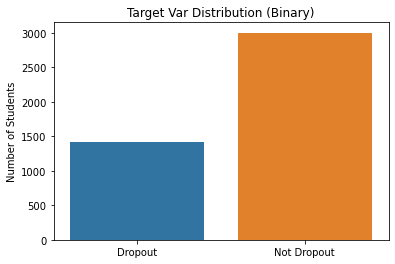

In [45]:
data_binary = copy.deepcopy(data_raw)
data_binary['Target'] = data_binary['Target'].map({'Dropout':'Dropout', 'Graduate':'Not Dropout', 'Enrolled':'Not Dropout'})

sns.countplot(x=data_binary['Target'], data=data_binary)

plt.title('Target Var Distribution (Binary)')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

#### Save dataset with binary target variable

In [46]:
data_binary['Target'] = data_binary['Target'].map({'Dropout':1, 'Not Dropout':0})
data_binary.to_csv('data_clean.csv', index=False)

## Assess Predictor Variables

In [47]:
data = data_binary
X = data.drop('Target', axis=1)
y = data['Target']

#### Plot predictor distributions

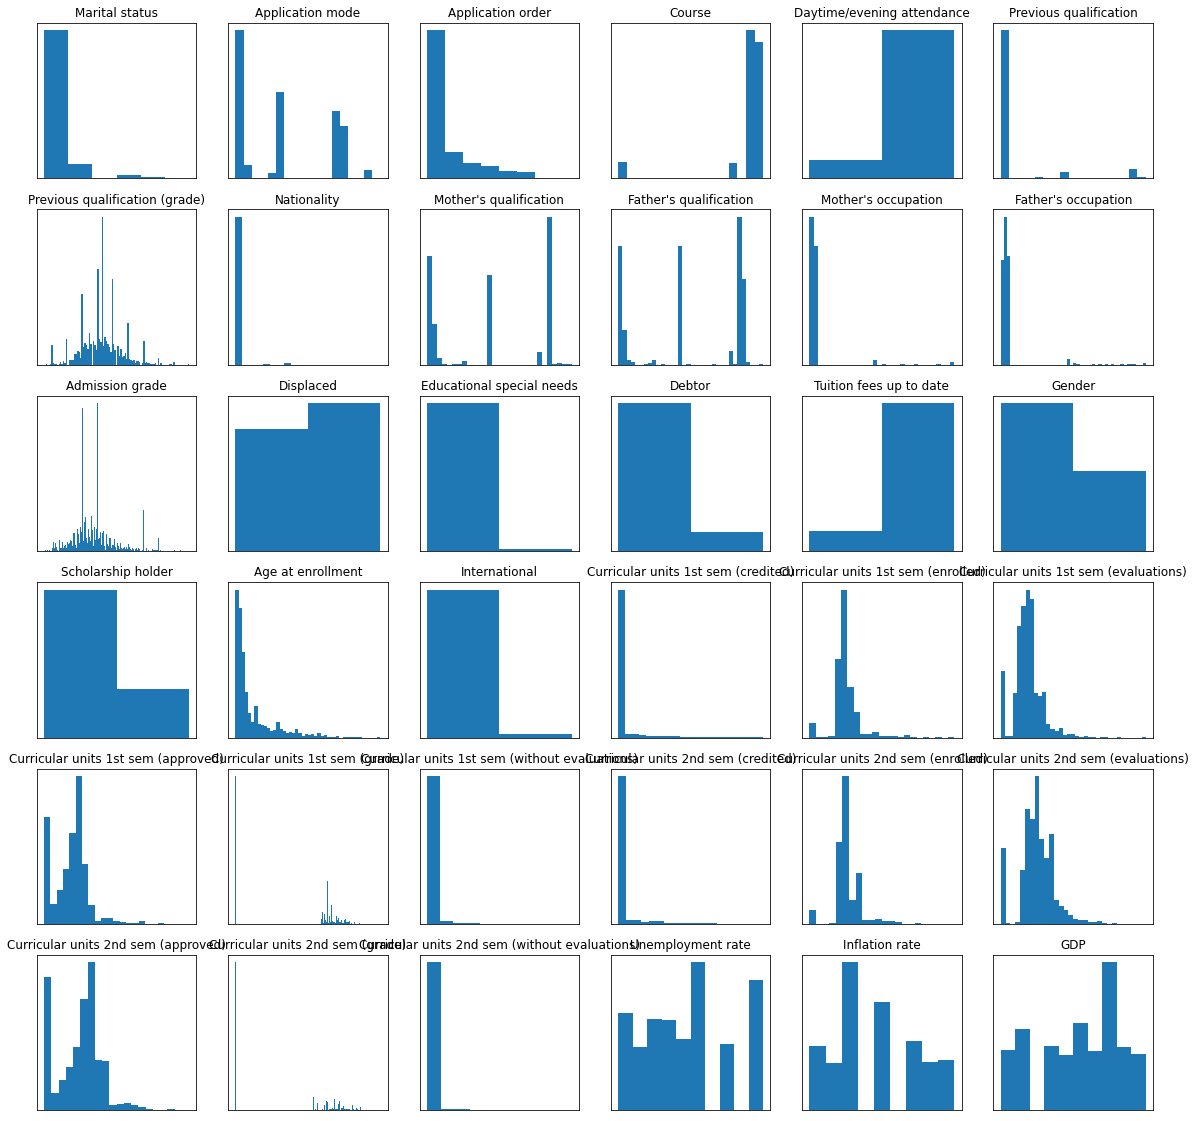

In [48]:
# plot predictor distributions 

fig, axes = plt.subplots(6, 6, figsize=(20, 20)) 

for col, ax in zip(X.columns, axes.flat):
    ax.set_title(col)  
    ax.hist(X[col], bins=len(X[col].unique()))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Some features, like occupation and qualification, are too sparse. Many levels have so few observations that we can't infer anything about their relationships to the target.<br>
It looks like some of these levels were gathered from written-in survey responses and very badly cleaned, because many levels are obviously redundant to others.<br>
Redundant or very similar levels are grouped together, while other very uncommon responses are grouped into an "Other" category.

In [49]:
# Mother's occupation

mapping = {
    1: [9],
    2: [4, 144, 141, 143],
    3: [5, 151, 153],
    4: [3, 132, 134],
    5: [2, 131],
    6: [7, 175, 193, 173, 171],
    7: [0],
    8: [1],
    9: [6, 192],
    10: [8],
    11: [191],
    12: [90, 99, 123, 10, 152, 122, 194, 122, 125]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Mother\'s occupation"] = X["Mother\'s occupation"].replace(reverse_mapping)

In [50]:
# Father's occupation

mapping = {
    1: [9], 
    2: [7, 171, 172, 174, 175, 193], 
    3: [5, 151, 152, 153, 154], 
    4: [4, 124, 141, 143, 144], 
    5: [3, 132, 134], 
    6: [8, 181, 182, 183], 
    7: [10],
    8: [6, 161, 163, 192], 
    9: [2, 121, 131], 
    10: [1],
    11: [0],
    12: [90, 99, 101, 102, 103, 112, 114, 122, 123, 135, 194, 195]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Father\'s occupation"] = X["Father\'s occupation"].replace(reverse_mapping)


In [51]:
# Mother's qualification / Father's qualification
# same mapping for both because distributions are very similar, unlike occupation

mapping = {
    1: [1],
    2: [37],
    3: [19, 9, 14, 10],
    4: [38, 11, 30, 26],
    5: [3],
    6: [34, 36, 22, 35, 41, 6, 25, 27, 33, 20, 42, 18, 13, 31],
    7: [2, 40, 29],
    8: [4, 43],
    9: [12],
    10: [5, 44],
    11: [39]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}

X["Father\'s qualification"] = X["Father\'s qualification"].replace(reverse_mapping)
X["Mother\'s qualification"] = X["Mother\'s qualification"].replace(reverse_mapping)

In [52]:
# Nationality

mapping = {
    1: [1],
    2: [41],
    3: [26, 14, 22, 6, 24, 100, 11, 103, 21, 101, 62, 25, 2, 105, 32, 13, 109, 108, 14, 17]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X["Nationality"] = X["Nationality"].replace(reverse_mapping)

In [53]:
# Application mode

mapping = {
    0: [10, 2, 57, 56, 27, 26]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X["Application mode"] = X["Application mode"].replace(reverse_mapping)

In [54]:
# Previous qualification

mapping = {
    12: [38, 5],
    19: [9, 10, 15, 14],
    4: [43]
}

reverse_mapping = {v: k for k, values in mapping.items() for v in values}
X['Previous qualification'] = X['Previous qualification'].replace(reverse_mapping)

X.to_csv('X.csv', index=False)

## Outliers

Since our data contains mixed types and features with highly skewed distributions, let's use an isolation forest to detect outliers, as it is model agnostic. 

In [55]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(random_state=1)
iso.fit(X)

X['Anomaly'] = iso.predict(X)
X['Anomaly'].value_counts()

 1    3760
-1     664
Name: Anomaly, dtype: int64

The model with default parameters marked 13% of the dataset as outliers, which is way too much. Let's reduce the contamination parameter.

In [56]:
iso = IsolationForest(random_state=1, contamination=0.01)
iso.fit(X)

X['Anomaly'] = iso.predict(X)
X['Anomaly'].value_counts()

 1    4379
-1      45
Name: Anomaly, dtype: int64

For now, we'll leave the outliers in and continue the data exploration. Later, we can use cross validation to choose a value for the contamination parameter. 

In [57]:
X = X.drop('Anomaly', axis=1)

## Linearity

In [58]:
# drop features which are all 0

X = X.drop(['Curricular units 1st sem (credited)', 
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (without evaluations)'], axis=1)

C:\Users\Melanie\AppData\Local\Temp\ipykernel_22324\4043886594.py:27: RuntimeWarning: invalid value encountered in log
  x_log = np.where(x > 0, np.log(x + 1e-5), 0)
C:\Users\Melanie\AppData\Local\Temp\ipykernel_22324\4043886594.py:27: RuntimeWarning: invalid value encountered in log
  x_log = np.where(x > 0, np.log(x + 1e-5), 0)


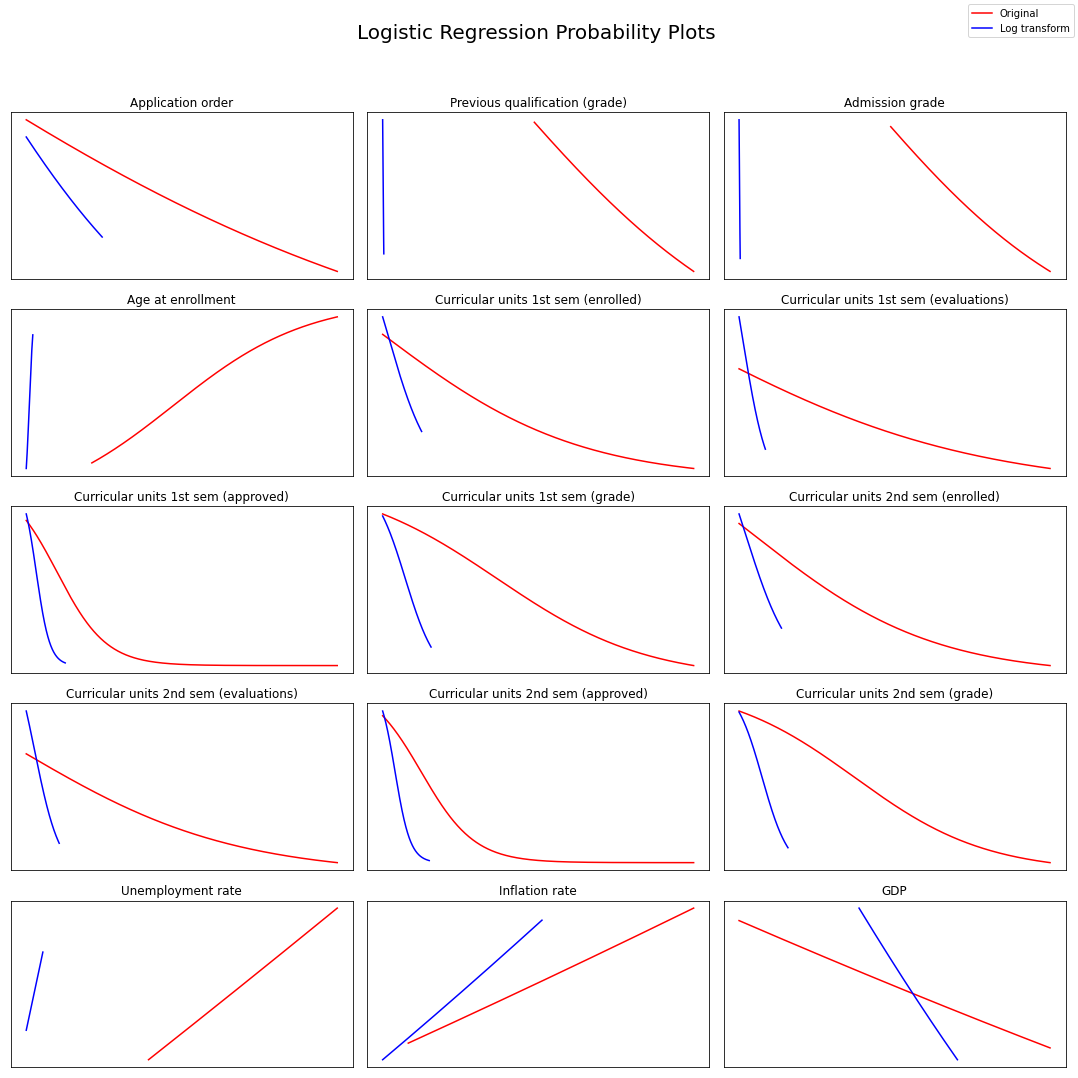

In [59]:
from sklearn.linear_model import LogisticRegression

# Define interval/ratio features
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

model = LogisticRegression()

fig, axes = plt.subplots(5, 3, figsize=(15, 15)) 

for col, ax in zip(num, axes.flat):
    # original feature scale
    x = X[col].to_numpy()
    x_log = np.where(x > 0, np.log(x + 1e-5), 0)

    # log transformed feature
    x = x.reshape(-1, 1)
    x_log = x_log.reshape(-1, 1)

    # get probabilities for original scale
    model.fit(x, y)
    x_range = np.linspace(x.min(), x.max(), 1000)
    y_prob = model.predict_proba(x_range.reshape(-1, 1))[:, 1]

    # get probabilities for log transform
    model.fit(x_log, y)
    x_range_log = np.linspace(x_log.min(), x_log.max(), 1000)
    y_prob_log = model.predict_proba(x_range_log.reshape(-1, 1))[:, 1]

    # plot
    ax.plot(x_range, y_prob, color='red', label='Original')
    ax.plot(x_range_log, y_prob_log, color='blue', label='Log transform')
    ax.set_title(col)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.suptitle('Logistic Regression Probability Plots', fontsize=20)     
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plt.close()


In [60]:
# Box-Tidwell test

import numpy as np
import statsmodels.api as sm

# Define ordinal features, excluding features which are all 0
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

X_log = pd.DataFrame()

# Add new features which are the natural logs of the current features
for col in num:
    X_log['log_' + col] = np.where(X[col] > 0, np.log(X[col] + 1e-5), 0)  # Add a small constant to avoid log(0)

# Add a constant
X_log = sm.add_constant(X_log)

# Fit the model
logit_model = sm.Logit(y, X[num]).fit()
print(logit_model.summary())

logit_log = sm.Logit(y, X_log).fit()
print(logit_log.summary())

Optimization terminated successfully.
         Current function value: 0.359516
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4409
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.4273
Time:                        21:26:31   Log-Likelihood:                -1590.5
converged:                       True   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Application order                          0.0199   

c:\Users\Melanie\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Melanie\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Based on the plots and the summary statistics, we'll apply logistic transformations to the following:
- Age at enrollment
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 2nd sem (approved) 

In [61]:
# replace features with transformations

X['Age at enrollment'] = X_log['log_Age at enrollment']
X['Curricular units 1st sem (enrolled)'] = X_log['log_Curricular units 1st sem (enrolled)']
X['Curricular units 1st sem (approved)'] = X_log['log_Curricular units 1st sem (approved)']
X['Curricular units 1st sem (grade)'] = X_log['log_Curricular units 1st sem (grade)']
X['Curricular units 2nd sem (approved)'] = X_log['log_Curricular units 2nd sem (approved)']

X.to_csv('X.csv', index=False)

## Multicolinearity

Let's have a look at multicolinearity. We'll use the results to inform feature selection at a later stage.

<AxesSubplot:>

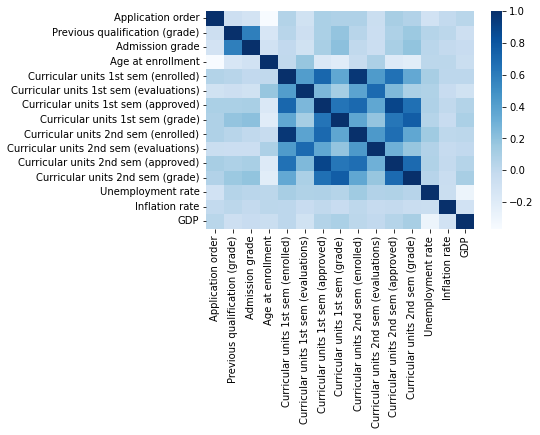

In [62]:
# INTERVAL / RATIO FEATURES

# define non-categorical features
num = ['Application order', 
       'Previous qualification (grade)', 
       'Admission grade',
       'Age at enrollment', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 
       'GDP']

# create an association matrix with spearman correlation
matrix = X[num].corr(method='spearman')
sns.heatmap(matrix, cmap='Blues')

The results are predictable. Admission grade and Previous qualification (grade) are highly correlated, and curricular units have high multicollinearity among themselves. The feature set contains a lot of redundancy. 

In [63]:
X.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

<AxesSubplot:>

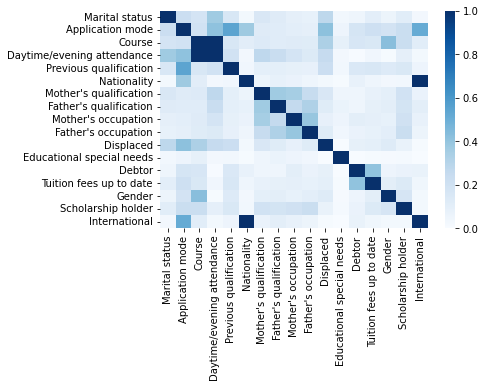

In [64]:
# CATEGORICAL FEATURES

# create an association matrix with cramer's v
from scipy.stats import chi2_contingency

# define categorical features
cat = ['Marital status', 
       'Application mode', 
       'Course',
       'Daytime/evening attendance', 
       'Previous qualification',
       'Nationality',
       'Mother\'s qualification', 
       'Father\'s qualification',
       'Mother\'s occupation', 
       'Father\'s occupation', 
       'Displaced', 
       'Educational special needs', 
       'Debtor',
       'Tuition fees up to date', 
       'Gender', 
       'Scholarship holder',
       'International']

def cramers_V(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    return np.sqrt(phi2 / min((k - 1), (r - 1)))

matrix = pd.DataFrame(index=cat, columns=cat)

# get cramer's v for each feature pair
for var1 in cat:
    for var2 in cat:
        if var1 == var2: #var against itself
            matrix.loc[var1, var2] = 1.0  
        else:
            matrix.loc[var1, var2] = cramers_V(X[var1], X[var2])

matrix = matrix.astype('float')
  
sns.heatmap(matrix, cmap='Blues')

Of course, International and Nationality are perfectly associated. Application mode is somewhat associated with them both, as well as Previous qualification. Course and Daytime/evening attendance are nearly perfectly associated as well. There are a few weak associations, particularly among the parental information. This will be sorted out in feature selection later.

<AxesSubplot:>

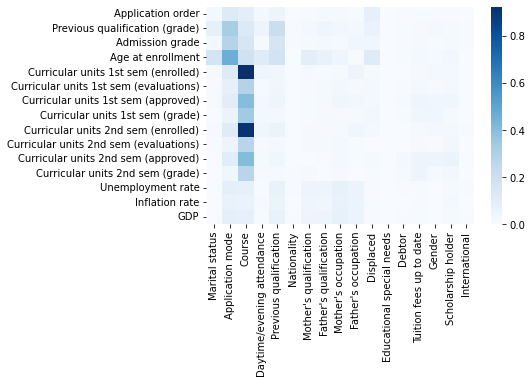

In [65]:
# MIXED TYPES

from sklearn.feature_selection import mutual_info_classif

# create an association matrix with mutual information 
matrix = pd.DataFrame(index=num, columns=cat)

for var1 in num:
    for var2 in cat:
        matrix.loc[var1, var2] = mutual_info_classif(X[var1].to_frame(), X[var2], discrete_features=False, random_state=1)

matrix = matrix.astype('float')
  
sns.heatmap(matrix, cmap='Blues')

Course is highly associated with enrolled units (1st and 2nd sem), and weakly associated with the other features measuring units. Age at enrollment is somewhat associated with application mode. 

In [66]:
# export X with feature engineering

X.to_csv('LogReg/X.csv', index=False)